# **REGRESSION EXAMPLE (INTRODUCTION)**

In [ ]:
# import image module
from IPython.display import Image


# get the image
Image(url="https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_correlation-regression/Graph-BMI-Cholesterol.png")

Based and adapted from: DataScience in Python https://www.oreilly.com/library/view/python-data-science/9781491912126/



# In Depth: Linear Regression

Linear regression models are a good starting point for regression tasks.
Such models are popular because they can be fit very quickly, and are very interpretable.
You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

In this section we will start with a quick intuitive walk-through of the mathematics behind this well-known problem, before seeing how before moving on to see how linear models can be generalized to account for more complicated patterns in data.

We begin with the standard imports:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt #This library is used to create charts and data visualizations.
import seaborn as sns; sns.set() #Seaborn is a high-level library that makes it easy to create attractive and stylish plots using matplotlib.
import numpy as np #This library is used to perform mathematical operations with matrices and vectors.

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data (n=15, random.seed = 100), which is scattered about a line with a slope of 2 and an intercept of -5:

x: ..........
[5.43404942 2.78369385 4.24517591 8.44776132 0.04718856 1.21569121
 6.70749085 8.25852755 1.3670659  5.75093329 8.91321954 2.09202122
 1.8532822  1.0837689  2.19697493]
y: ...........
[ 6.29109562  0.1285609   2.98893835 10.23681981 -5.91320017 -3.07735202
  9.19647011 10.86267407 -2.22469574  6.29994968 11.95562594 -0.58702549
 -1.70147555 -2.93638733  0.96112864]


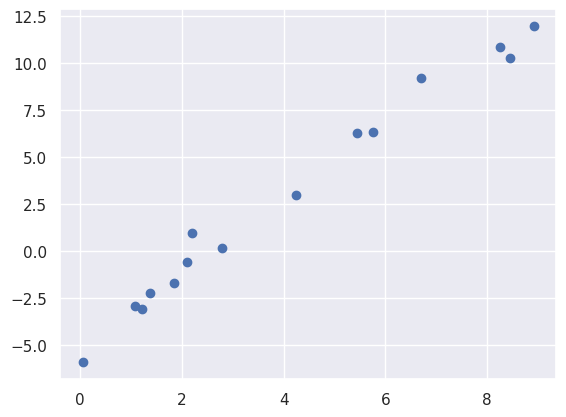

In [5]:
#create data using simulation
rng = np.random.RandomState(100)
x = 10 * rng.rand(15)
y = 2 * x - 5 + rng.randn(15)

print("x: ..........")
print(x) #to see what is x
print("y: ...........")
print(y) #in order to see what is y
plt.scatter(x, y); #scatterplot

We can use the library Scikit-Learn's (see https://scikit-learn.org/stable/) ``LinearRegression`` estimator to fit this data and construct the best-fit line:

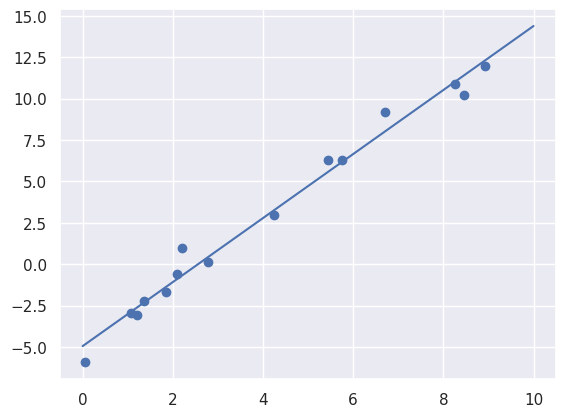

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) #regresion models using OLS

model.fit(x[:, np.newaxis], y) #object that contains model estimations
#x[:, np.newaxis] #is x in array form

xfit = np.linspace(0, 10, 1000) #scale
yfit = model.predict(xfit[:, np.newaxis]) #y predictions

plt.scatter(x, y) #scatterplot dots
plt.plot(xfit, yfit); #scatterplot y estimations

In [ ]:
x[:, np.newaxis] #x values

array([[5.43404942],
       [2.78369385],
       [4.24517591],
       [8.44776132],
       [0.04718856],
       [1.21569121],
       [6.70749085],
       [8.25852755],
       [1.3670659 ],
       [5.75093329],
       [8.91321954],
       [2.09202122],
       [1.8532822 ],
       [1.0837689 ],
       [2.19697493]])

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [ ]:
print("Model slope:    ", model.coef_[0]) #parameter estiation of a
print("Model intercept:", model.intercept_) #paraeter estimation of b

Model slope:     1.933773126321281
Model intercept: -4.9541778849977955


We see that the results are very close to the inputs, as we might hope.

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle **multidimensional linear models** of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this problem is analogous to fitting a hyperplane (e.g., using least squares regression) to points in a higher-dimensional space.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [7]:
#DATA SIMULATION: Here the  y  data is constructed from three random  x  values, and the linear regression recovers the coefficients used to construct the data
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3) #n=100, using simulation generate 3 independent variables (X1, X2, X3)
y = 0.5 + np.dot(X, [1.5, -2., 1.]) #see https://www.tutorialspoint.com/numpy/numpy_dot.htm
print(X,y)


[[4.17022005e+00 7.20324493e+00 1.14374817e-03]
 [3.02332573e+00 1.46755891e+00 9.23385948e-01]
 [1.86260211e+00 3.45560727e+00 3.96767474e+00]
 [5.38816734e+00 4.19194514e+00 6.85219500e+00]
 [2.04452250e+00 8.78117436e+00 2.73875932e-01]
 [6.70467510e+00 4.17304802e+00 5.58689828e+00]
 [1.40386939e+00 1.98101489e+00 8.00744569e+00]
 [9.68261576e+00 3.13424178e+00 6.92322616e+00]
 [8.76389152e+00 8.94606664e+00 8.50442114e-01]
 [3.90547832e-01 1.69830420e+00 8.78142503e+00]
 [9.83468338e-01 4.21107625e+00 9.57889530e+00]
 [5.33165285e+00 6.91877114e+00 3.15515631e+00]
 [6.86500928e+00 8.34625672e+00 1.82882773e-01]
 [7.50144315e+00 9.88861089e+00 7.48165654e+00]
 [2.80443992e+00 7.89279328e+00 1.03226007e+00]
 [4.47893526e+00 9.08595503e+00 2.93614148e+00]
 [2.87775339e+00 1.30028572e+00 1.93669579e-01]
 [6.78835533e+00 2.11628116e+00 2.65546659e+00]
 [4.91573159e+00 5.33625451e-01 5.74117605e+00]
 [1.46728575e+00 5.89305537e+00 6.99758360e+00]
 [1.02334429e+00 4.14055988e+00 6.944001

In [8]:
#OLS estimation (ORDINARY least squares regression)
model.fit(X, y)
print(model.intercept_) #Beta_0
print(model.coef_) #Beta_1, Beta_2, Beta_3

0.5000000000000033
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

# Regression metrics

See in: https://www.datatechnotes.com/2019/10/accuracy-check-in-python-mae-mse-rmse-r.html

Also see in: https://www.statology.org/k-fold-cross-validation-in-python/ (example)


## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.
We have seen one version of this before, in the ``PolynomialRegression`` pipeline used in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) and [Feature Engineering](05.04-Feature-Engineering.ipynb).
The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [9]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(degree =3, include_bias=False) #see in https://www.jeremyjordan.me/polynomial-regression/
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression.

As we saw in [Feature Engineering](05.04-Feature-Engineering.ipynb), the cleanest way to accomplish this is to use a pipeline.
Let's make a 7th-degree polynomial model in this way:

In [10]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(degree =7),
                           LinearRegression()) #7th-degree polynomial REGRESSION model

With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$.
For example, here is a sine wave with noise:

In [11]:
#EXAMPLE OF POLYNOMIAL REGRESSION (NONLINEAR)

#GENERATE DATA USING SIMULATION
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) #n=50
y = np.sin(x) + 0.1 * rng.randn(50) #NONLINEAR FUNCTION

#PRINT SIMULATED DATA:
print("x:............")
print(x)
print("y:............")
print(y)



x:............
[4.17022005e+00 7.20324493e+00 1.14374817e-03 3.02332573e+00
 1.46755891e+00 9.23385948e-01 1.86260211e+00 3.45560727e+00
 3.96767474e+00 5.38816734e+00 4.19194514e+00 6.85219500e+00
 2.04452250e+00 8.78117436e+00 2.73875932e-01 6.70467510e+00
 4.17304802e+00 5.58689828e+00 1.40386939e+00 1.98101489e+00
 8.00744569e+00 9.68261576e+00 3.13424178e+00 6.92322616e+00
 8.76389152e+00 8.94606664e+00 8.50442114e-01 3.90547832e-01
 1.69830420e+00 8.78142503e+00 9.83468338e-01 4.21107625e+00
 9.57889530e+00 5.33165285e+00 6.91877114e+00 3.15515631e+00
 6.86500928e+00 8.34625672e+00 1.82882773e-01 7.50144315e+00
 9.88861089e+00 7.48165654e+00 2.80443992e+00 7.89279328e+00
 1.03226007e+00 4.47893526e+00 9.08595503e+00 2.93614148e+00
 2.87775339e+00 1.30028572e+00]
y:............
[-0.92530881  0.71111718 -0.06598087  0.11672496  0.88294471  0.8210899
  1.12370616 -0.23467501 -0.75446517 -0.86898322 -0.94231439  0.70804351
  0.89495535  0.53638242  0.28955648  0.61914583 -0.84603144 

In [12]:
#FIT POLYNOMIAL MODEL
poly_model.fit(x[:, np.newaxis], y )
yfit = poly_model.predict(xfit[:, np.newaxis]) #using poly_model.predict-> degree =7
print("yfit:............")
print(yfit)



yfit:............
[ 2.84726260e-02  3.19164825e-02  3.56121799e-02  3.95534149e-02
  4.37339536e-02  4.81476307e-02  5.27883493e-02  5.76500805e-02
  6.27268627e-02  6.80128016e-02  7.35020692e-02  7.91889041e-02
  8.50676103e-02  9.11325576e-02  9.73781805e-02  1.03798978e-01
  1.10389514e-01  1.17144415e-01  1.24058371e-01  1.31126136e-01
  1.38342526e-01  1.45702418e-01  1.53200753e-01  1.60832531e-01
  1.68592814e-01  1.76476724e-01  1.84479444e-01  1.92596217e-01
  2.00822344e-01  2.09153185e-01  2.17584159e-01  2.26110745e-01
  2.34728476e-01  2.43432945e-01  2.52219801e-01  2.61084751e-01
  2.70023557e-01  2.79032036e-01  2.88106063e-01  2.97241566e-01
  3.06434528e-01  3.15680986e-01  3.24977034e-01  3.34318815e-01
  3.43702528e-01  3.53124425e-01  3.62580809e-01  3.72068036e-01
  3.81582514e-01  3.91120701e-01  4.00679108e-01  4.10254296e-01
  4.19842875e-01  4.29441506e-01  4.39046899e-01  4.48655815e-01
  4.58265062e-01  4.67871497e-01  4.77472024e-01  4.87063598e-01
  4.966

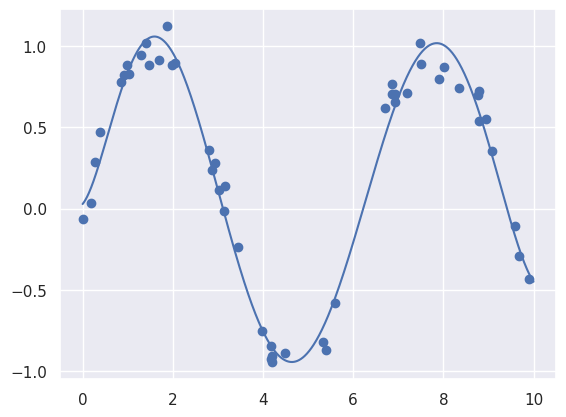

In [ ]:
#REPRESENT DATA AND FITED Y
plt.scatter(x, y)
plt.plot(xfit, yfit);

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

But maybe we can't let choose the degree of the polynomial automatically. This must be adjusted in a rational way so that it is not underfitting or overfitting.

Let's see an example if the degree of the polynomial is smaller in this supervised regression model. (Partially based on: https://www.datatechnotes.com/2018/06/polynomial-regression-fitting-in-python.html)

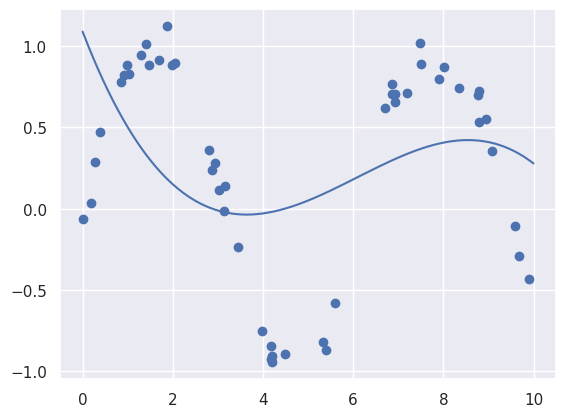

In [13]:
from sklearn.pipeline import make_pipeline
poly_model1 = make_pipeline(PolynomialFeatures(degree = 3),
                           LinearRegression())


rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model1.fit(x[:, np.newaxis], y)
yfit1 = poly_model1.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit1);


**EXERCISE**
What happens in this case? How do we measure it?



Let's see another situation with a polynomial model of degree 18

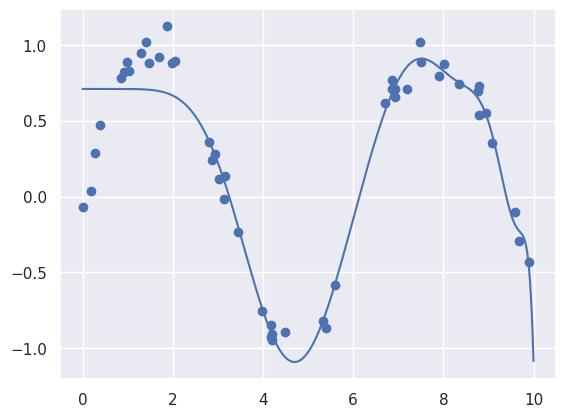

In [14]:
from sklearn.pipeline import make_pipeline
poly_model1 = make_pipeline(PolynomialFeatures(degree = 18),
                           LinearRegression())


rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model1.fit(x[:, np.newaxis], y)
yfit1 = poly_model1.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit1);

**EXERCISE**
What happens in this case? How do we measure it?





# ADVANCED REGRESSION MODELS

### Gaussian basis functions

Of course, other basis functions are possible.
For example, one useful pattern is to fit a model that is not a sum of polynomial bases, but a sum of Gaussian bases.
The result might look something like the following figure:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.06-gaussian-basis.png?raw=1)
[figure source in Appendix](#Gaussian-Basis)

The shaded regions in the plot are the scaled basis functions, and when added together they reproduce the smooth curve through the data.
These Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them, as shown here and illustrated in the following figure (Scikit-Learn transformers are implemented as Python classes; reading Scikit-Learn's source is a good way to see how they can be created):

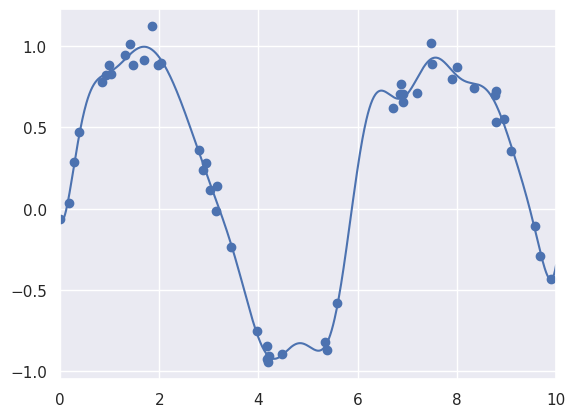

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

We put this example here just to make clear that there is nothing magic about polynomial basis functions: if you have some sort of intuition into the generating process of your data that makes you think one basis or another might be appropriate, you can use them as well.

## Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) for a discussion of this).
For example, if we choose too many Gaussian basis functions, we end up with results that don't look so good:

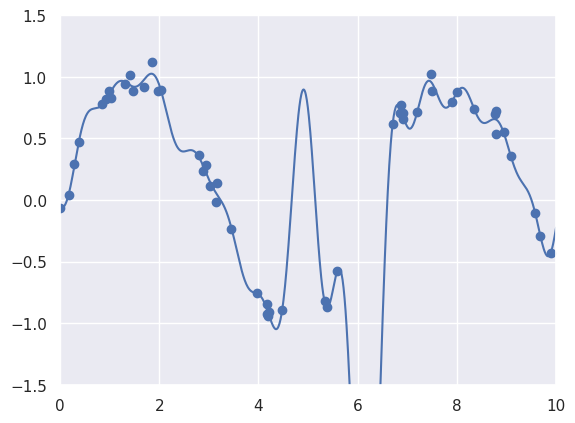

In [ ]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

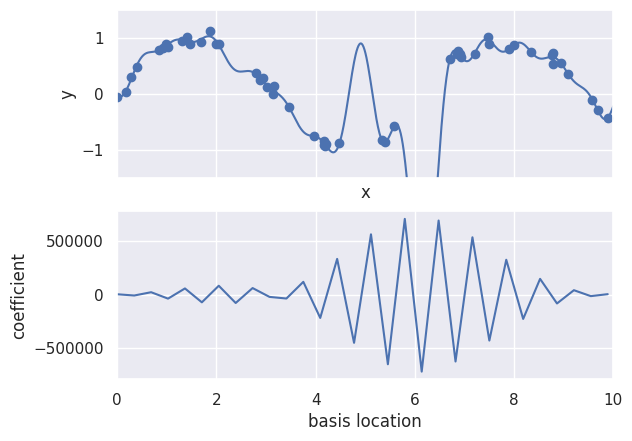

In [ ]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

The lower panel of this figure shows the amplitude of the basis function at each location.
This is typical over-fitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out.
We know that such behavior is problematic, and it would be nice if we could limit such spikes expliticly in the model by penalizing large values of the model parameters.
Such a penalty is known as *regularization*, and comes in several forms.

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.
This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator:

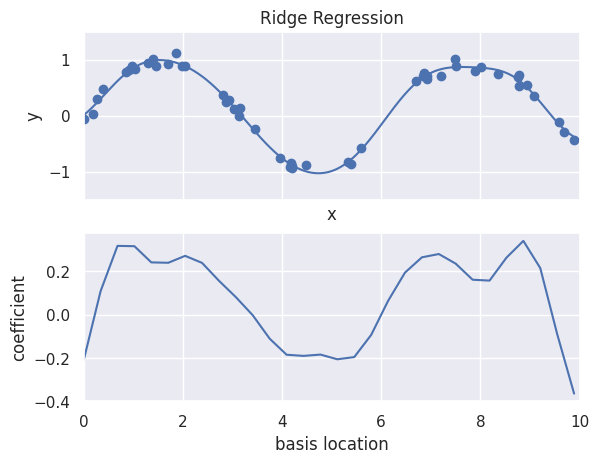

In [ ]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.
One advantage of ridge regression in particular is that it can be computed very efficiently—at hardly more computational cost than the original linear regression model.

### Lasso regression ($L_1$ regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients:
$$
P = \alpha\sum_{n=1}^N |\theta_n|
$$
Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor *sparse models* where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


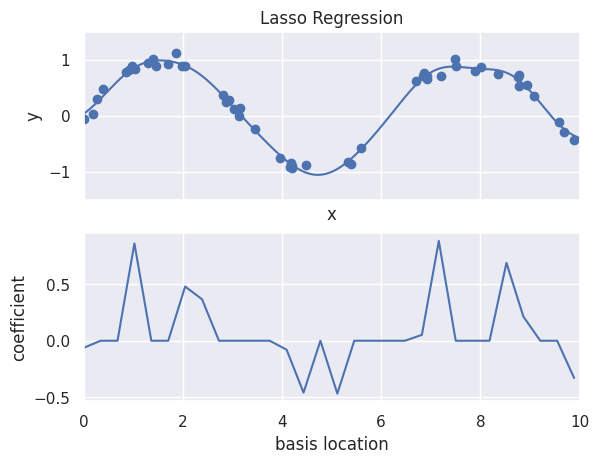

In [ ]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behavior being modeled by a small subset of the available basis functions.
As with ridge regularization, the $\alpha$ parameter tunes the strength of the penalty, and should be determined via, for example, cross-validation (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) for a discussion of this).

This example was based in:Python Data Science Handbook

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*


<!--NAVIGATION-->
< [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) | [Contents](Index.ipynb) | [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

<!--NAVIGATION-->
< [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) | [Contents](Index.ipynb) | [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
